In [53]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, make_scorer



In [3]:
#Loading the dataset
bace = pd.read_csv("bace.csv")

In [4]:
#Understand the dataset

#Chemical descriptors, bioactivity data and physicochemical property data

bace.head()

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,5


In [5]:
#Data pre-processing
#Handle missing values
bace.isna().sum()

mol                0
CID                0
Class              0
Model              0
pIC50              0
                  ..
PEOE11 (PEOE11)    0
PEOE12 (PEOE12)    0
PEOE13 (PEOE13)    0
PEOE14 (PEOE14)    0
canvasUID          0
Length: 595, dtype: int64

In [6]:
# 3 object columns in dataset - mol (unique for each compound), CID and model (label for train/test/validation dataset)
#Rest of the columns are int or float
bace.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Columns: 595 entries, mol to canvasUID
dtypes: float64(210), int64(382), object(3)
memory usage: 6.9+ MB


In [7]:
bace.describe()

,Class,pIC50,MW,AlogP,HBA,HBD,RB,HeavyAtomCount,ChiralCenterCount,ChiralCenterCountAllPossible,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,...,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,0.456709,6.521991,479.661988,3.177080,3.732981,2.001322,8.049570,34.089227,0.522802,2.317250,...,52.348846,48.763740,181.835580,148.442348,30.371697,3.488650,11.740560,1.239762,14.387597,783.779907
std,0.498287,1.342417,122.083053,1.396633,1.444778,1.629343,4.741135,8.520088,1.162539,1.612558,...,25.993800,18.201519,99.717702,60.548833,12.162452,5.148336,9.073406,3.293804,13.329890,444.468806
min,0.000000,2.544546,138.187000,-4.361100,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,...,0.000000,-3.551821,1.916970,-5.536391,-2.216191,-7.286308,-6.106466,-7.379991,-1.273524,1.000000
25%,0.000000,5.585027,389.331300,2.335500,3.000000,0.000000,4.000000,28.000000,0.000000,1.000000,...,34.319988,36.547150,102.233770,102.510450,20.132990,0.000000,7.980170,0.000000,0.000000,407.000000
50%,0.000000,6.761954,463.628300,3.171300,4.000000,2.000000,7.000000,33.000000,0.000000,2.000000,...,51.479984,47.624382,171.917220,140.683620,30.107586,0.550130,8.188327,0.000000,21.710098,788.000000
75%,1.000000,7.540000,564.639530,4.015500,4.000000,3.000000,11.000000,40.000000,1.000000,3.000000,...,66.553795,58.844093,253.679080,185.659260,37.133846,7.980170,15.879790,0.000000,24.663788,1167.000000
max,1.000000,10.522879,1350.473300,7.617400,12.000000,15.000000,40.000000,97.000000,10.000000,12.000000,...,161.342860,124.272730,865.473330,378.516270,121.671900,29.823961,80.218018,16.681131,61.659470,1547.000000


In [8]:
#Dta pre-processing - remove duplicates
#Dropping model label as it is not necessary, CID and mol as it is unique for each molecule
bace_1= bace.drop(['Model', 'mol', 'CID'], axis = 1)

In [96]:
#Some important features here are: MW of molecule, ideally below 500 Da
#Molecules have been converted to fingerprints here
#Molecule descriptors have been generated to calculate physicochemical properties
# pIC50 which is -log(IC50) as the target value to predict as this is the value we need for a given assay for unknown compounds. Lower concentration the better. So higher the pIC50 the better the compound is. 
# AlogP - 
# Multiple columns represent molecular fingerprint from molecules, creating molecular descriptors and unique identities



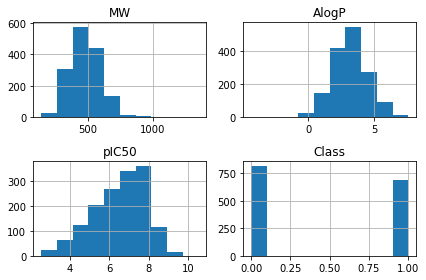

In [97]:
#Check for distribution of data
#Data not skewed towards active or inactive compounds
#Data skewed towardspotency >100 nM with minority < 100 nM
bace_1.hist(column = ['MW', 'AlogP', 'pIC50', 'Class'])
plt.tight_layout()
plt.show()

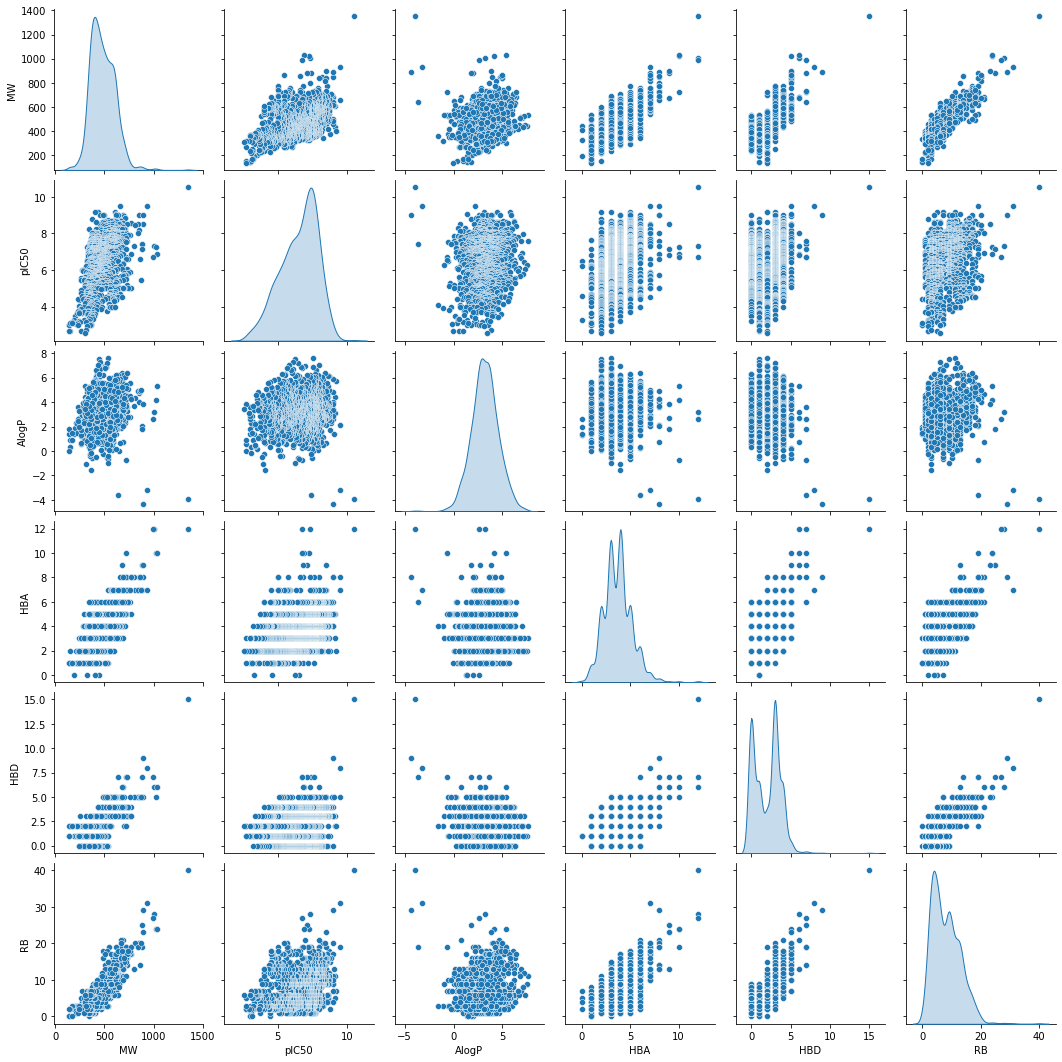

In [98]:
#Check pairwise correlations between variables
sns.pairplot(bace_1[["MW","pIC50","AlogP","HBA","HBD","RB"]], diag_kind = "kde")
plt.show()

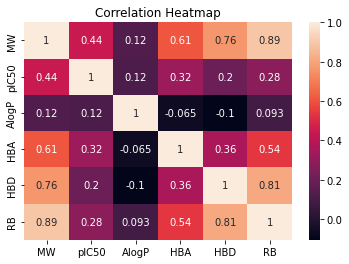

In [99]:
#Obtain a correlation matrix for variables
corr_matrix = bace_1[["MW","pIC50","AlogP","HBA","HBD","RB"]].corr()
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Heatmap")
plt.show()

In [100]:
#Standardization of data and fitting data to 2 principal components, plotting data to show distribution by pIC50
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bace_1)

pca = PCA(n_components = 2)
pca_result = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
print ("Explained_variance_ratio:", explained_variance)

Explained_variance_ratio: [0.29478524 0.07492314]


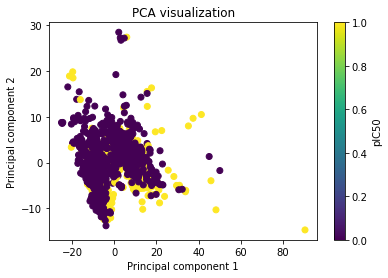

In [25]:
bace_1["PCA1"] = pca_result[:,0]
bace_1["PCA2"] = pca_result[:,1]

plt.scatter(bace_1["PCA1"], bace_1["PCA2"], c=bace_1["Class"])
plt.colorbar(label = "pIC50")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title ("PCA visualization")
plt.show()

In [101]:
#Trying t-SNE
tsne = TSNE(n_components = 2, perplexity = 30)
tsne_result = tsne.fit_transform(scaled_data)


C:\Users\rsreenivsan\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rsreenivsan\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


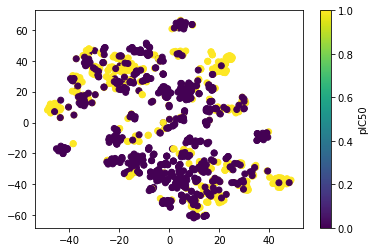

In [27]:
plt.scatter(tsne_result[:,0], tsne_result[:,1], c = bace_1['Class'])
plt.colorbar(label = 'pIC50')

In [39]:
bace_1.head()

,Class,pIC50,MW,AlogP,HBA,HBD,RB,HeavyAtomCount,ChiralCenterCount,ChiralCenterCountAllPossible,...,PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID,PCA1,PCA2
0,1,9.154901,431.56979,4.4014,3,2,5,32,2,2,...,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1,-1.974771,1.078634
1,1,8.853872,657.81073,2.6412,5,4,16,47,6,6,...,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2,15.316055,0.212913
2,1,8.698970,591.74091,2.5499,4,3,11,42,2,3,...,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3,10.107621,-3.488704
3,1,8.698970,591.67828,3.1680,4,3,12,40,4,5,...,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,4,8.817699,1.162583
4,1,8.698970,629.71283,3.5086,3,3,11,44,2,3,...,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,5,12.048180,-5.629809


In [35]:
#Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(bace_1.drop('Class', axis = 1), bace_1.Class, test_size=0.33, random_state=42)

In [54]:
def sensitivity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

In [111]:
# LogisticRegression 
lr_params1 = {'penalty' : ['l1', 'l2', 'elasticnet', None]}
lr_pipe1 = Pipeline([('scaled', StandardScaler()), ('model', GridSearchCV(LogisticRegression(max_iter = 1000), param_grid = lr_params1))])

lr_pipe1.fit(X_train, y_train)
lr_train_score1 = lr_pipe1.score(X_train, y_train)
lr_test_score1 = lr_pipe1.score(X_test, y_test)
lr_accuracy = accuracy_score(y_test, lr_pipe1.predict(X_test))
lr_train_sensitivity = sensitivity_score(y_test, lr_pipe1.predict(X_test))
lr_train_specificity = specificity_score(y_test, lr_pipe1.predict(X_test))
lr_avg_fit_time1 = lr_pipe1.named_steps['model'].cv_results_['mean_fit_time'].mean()
fitting = pd.DataFrame({'Model': 'Logistic Regression', 'Training_set Score':[lr_train_score1], 'Accuracy_Score': [lr_accuracy],'Fit time':[lr_avg_fit_time1],'Sensitivity': [lr_train_sensitivity], 'Specificity': [lr_train_specificity] })
#print(str([lr_train_score1, lr_test_score1, lr_avg_fit_time1, lr_train_sensitivity, lr_train_specificity, lr_accuracy]))
print (lr_fitting)
# Interpret: Because the data were scaled, we can think about the coefficients as speaking to a relative feature importance.
coef_df1 = pd.DataFrame({'feature' : lr_pipe1['scaled'].get_feature_names_out(), 'coefs' : lr_pipe1['model'].best_estimator_.coef_[0]})
coef_df1 = coef_df1.sort_values(by = 'coefs', ascending = False)
coef_df1.head()
    

                     Training_set Score  Accuracy_Score  Fit time  \
Model                                                               
Logistic Regression             0.99309           0.934  0.018095   

                     Sensitivity  Specificity  
Model                                          
Logistic Regression     0.917391     0.948148  


C:\Users\rsreenivsan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rsreenivsan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rsreenivsan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rsreenivsan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
   

,feature,coefs
0,pIC50,5.385969
4,HBD,1.096480
527,Ring Count 4 (RNGCNT4),0.938350
115,sssCH_Cnt,0.920888
452,Sum of topological distances between N..Cl (ST...,0.863969


In [112]:
# KNN
knn_params1 = {'n_neighbors': [1, 2, 3, 4, 5], 'weights' : ['uniform', 'distance']}

knn_pipe1 = Pipeline([('scaled', StandardScaler()),
    ('model', GridSearchCV(KNeighborsClassifier(), param_grid = knn_params1, scoring = 'accuracy'))])
knn_pipe1.fit(X_train, y_train)
knn_train_score1 = knn_pipe1.score(X_train, y_train)
knn_accuracy = accuracy_score(y_test, knn_pipe1.predict(X_test))
knn_sensitivity = sensitivity_score(y_test, knn_pipe1.predict(X_test))
knn_specificity = specificity_score(y_test, knn_pipe1.predict(X_test))
knn_avg_fit_time1 = knn_pipe1['model'].cv_results_['mean_fit_time'].mean()
knn_row = {'Model': 'KNN', 'Training_set Score':knn_train_score1, 'Accuracy_Score': knn_accuracy,'Fit time':knn_avg_fit_time1,'Sensitivity': knn_sensitivity, 'Specificity': knn_specificity}
fitting.loc[len(fitting)] = knn_row




In [113]:
# SVC
svc_params1 = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'], 'gamma': [0.1, 1.0, 10.0, 100.0]}
svc_pipe1 = Pipeline([
    ('scaled', StandardScaler()),
    ('model', GridSearchCV(SVC(), param_grid = svc_params1))])
svc_pipe1.fit(X_train, y_train)
svc_train_score1 = svc_pipe1.score(X_train, y_train)
svc_accuracy = accuracy_score(y_test, svc_pipe1.predict(X_test))
svc_sensitivity = sensitivity_score(y_test, svc_pipe1.predict(X_test))
svc_specificity = specificity_score(y_test, svc_pipe1.predict(X_test))
svc_avg_fit_time1 = svc_pipe1['model'].cv_results_['mean_fit_time'].mean()
svc_row = {'Model': 'SVC', 'Training_set Score':svc_train_score1, 'Accuracy_Score': svc_accuracy,'Fit time':svc_avg_fit_time1,'Sensitivity': svc_sensitivity, 'Specificity': svc_specificity}
fitting.loc[len(fitting)] = svc_row

In [114]:
print (fitting)

                 Model  Training_set Score  Accuracy_Score  Fit time  \
0  Logistic Regression            0.993090           0.934  0.020995   
1                  KNN            1.000000           0.814  0.004851   
2                  SVC            0.996051           0.942  0.094559   

   Sensitivity  Specificity  
0     0.917391     0.948148  
1     0.826087     0.803704  
2     0.930435     0.951852  
